In [15]:
from pathlib import Path

## 形態素解析結果の読み込み

In [16]:
res_mecab = Path("neko.txt.mecab")
sentences = []
morphs = []

with res_mecab.open() as file:
  for line in file:
    line = line.strip()
    if line != "EOS":
      fields = line.split("\t")
      if len(fields) != 2 or fields[0] == "": continue
      col = fields[1].split(",")
      morph = {"surface": fields[0], "base": col[6], "pos": col[0], "pos1": col[1]}
      morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []
for morph in sentences[2]:
  print(morph)

{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 動詞と動詞の基本形の抜き出し

In [17]:
verbs = set(morph["surface"] for morphs in sentences for morph in morphs
            if morph["pos"] == "動詞")
verb_bases = set(morph["base"] for morphs in sentences for morph in morphs
                 if morph["pos"] == "動詞")

## AのBという形の名詞句を抜き出し

In [18]:
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence)-2):
    if  sentence[i]["surface"] == "の" and sentence[i-1]["pos"] == "名詞" and sentence[i+1]["pos"] == "名詞":
      s = sentence[i-1]["surface"] + sentence[i]["surface"] + sentence[i+1]["surface"]
      ans.add(s)
print(len(ans))
for item in list(ans)[:10]:
  print(item)

4924
俺の汁粉
人間の嗜好
嬢の鼻
令嬢の鼻
自分の社会
御存じの事
窟の主人
他の動物
取りの次
心臓の形


## 名詞の連接

In [19]:
ans = set()
tmp = []
for sentence in sentences:
  for morph in sentence:
    if morph["pos"] == "名詞":
      tmp.append(morph["surface"])
    elif len(tmp) >=2:
      ans.add("".join(tmp))
      tmp = []
    else:
      tmp = []
print(len(ans))
for item in list(ans)[:10]:
  print(item)

4465
東嶺寺
裸体動物
めん子さん
生涯三鞭酒
運動術
豚仙さ
兎さん
多角形
長州征伐
俳人高浜虚子


## 単語の出現頻度

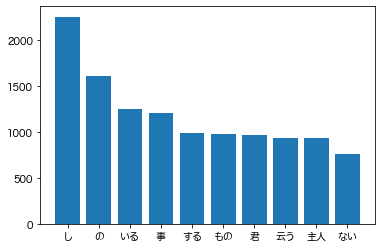

In [20]:
from collections import defaultdict as ddict

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']

word_dic = ddict(int)

for sentence in sentences:
  for morph in sentence:
    if morph["pos"] not in ["記号", "助詞", "助動詞"]:
      word_dic[morph["surface"]] += 1

word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

keys = [k for k,_ in word_dic[:10]]
values = [v for _,v in word_dic[:10]]

plt.bar(keys, values)
plt.show()

## 猫と共起頻度の高い語

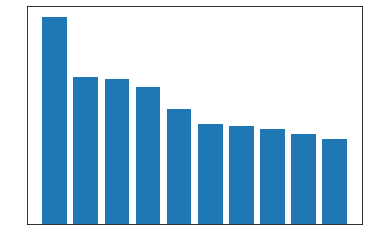

In [21]:
from collections import defaultdict as ddict

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']
plt.tick_params(colors='white')

word_dic = ddict(int)

for i, sentence in enumerate(sentences):
  # if i == 5: break
  word_list = [morph["surface"] for morph in sentence
               if morph["pos"] in ["動詞", "名詞", "形容詞"]]
  if "猫" in word_list:
    for word in word_list:
      if word != "猫":
        word_dic[word] += 1
word_dic = sorted(word_dic.items(), key= lambda x:x[1], reverse=True)
keys = [k for k,_ in word_dic[:10]]
values = [v for _,v in word_dic[:10]]

plt.bar(keys, values)
plt.show()

## ヒストグラム
ヒストグラムは階級の幅によりデータの見え方が変わる。
目安として以下のスタージュの公式が参考になる。
$$
N = 1 + \log_2{n}
$$
今回はデータ数が13559となったので上の公式に当てはめると、階級数は$N \simeq 15$が目安となる。

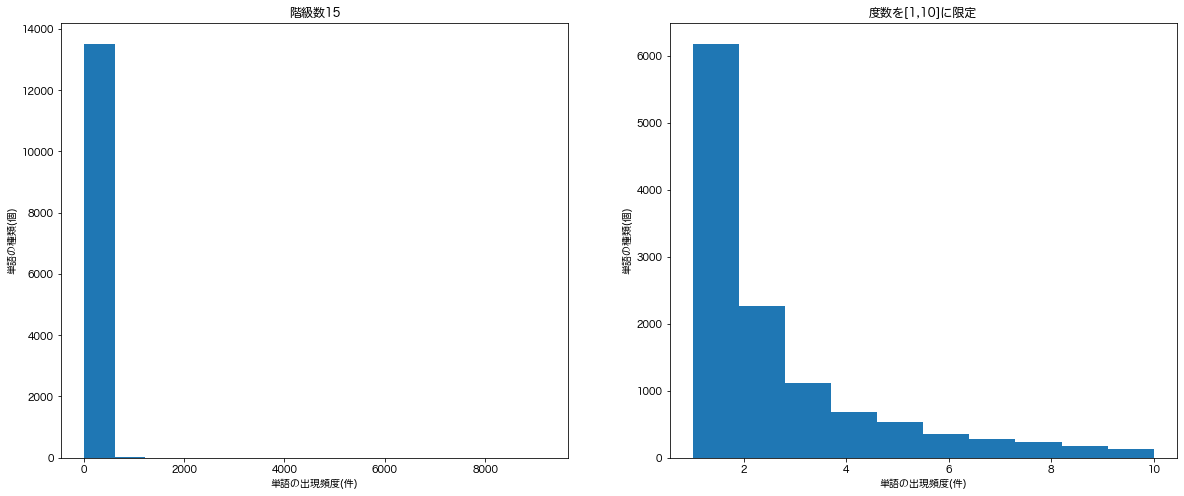

In [97]:
from collections import defaultdict as ddict

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']

word_dic = ddict(int)

for sentence in sentences:
  for morph in sentence:
    if morph["pos"] not in ["記号"]:
      word_dic[morph["surface"]] += 1

ans = word_dic.values()

fig = plt.figure(figsize=(20,8))
fig.set_facecolor('white')

ax1 = fig.add_subplot(1,2,1)
ax1.hist(ans, bins=15)
ax1.set_xlabel("単語の出現頻度(件)")
ax1.set_ylabel("単語の種類(個)")
ax1.set_title("階級数15")

ax2 = fig.add_subplot(1,2,2)
ax2.hist(ans, range=(1,10))
ax2.set_xlabel("単語の出現頻度(件)")
ax2.set_ylabel("単語の種類(個)")
ax2.set_title("度数を[1,10]に限定")

plt.show()

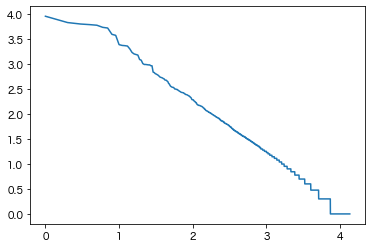

In [111]:
import numpy as np

ans = np.array(list(ans))
Y = np.sort(ans)[::-1]
X = range(1,len(ans)+1)

Y = np.log10(Y)
X = np.log10(X)

fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(X,Y)
plt.show()

In [107]:
Y

array([9194, 6868, 6420, ...,    1,    1,    1])